<a href="https://colab.research.google.com/github/nbkwon/ml-assignment/blob/master/ml_assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# we now need pyplot for plotting data
import matplotlib.pyplot as pyplot
def show_plot(download_file = False):
    pyplot.show()
    if download_file == False:
       return
    
    import google.colab
    file_name = "test.png"
    pyplot.savefig(file_name)
    google.colab.files.download(file_name)

def make_plot(plot_data_list, use_this = None):
    # it's too samll. make bigger.
    if use_this is None:
        pyplot.figure(figsize=(8, 8))
    else:
        # use_this.set_figheight(8)
        # use_this.set_figwidth(8)
        pass

    for data_dic, plot_type, color in plot_data_list:
        if plot_type is "plot":
            if use_this is None:
                pyplot.plot(list(data_dic.keys()), list(data_dic.values()), c=color)
            else:
                use_this.plot(list(data_dic.keys()), list(data_dic.values()), c=color)    
        if plot_type is "scatter":
            if use_this is None:
                pyplot.scatter(list(data_dic.keys()), list(data_dic.values()), c=color)
            else:
                use_this.scatter(list(data_dic.keys()), list(data_dic.values()), c=color)

In [0]:
# 이전 과제에서 쌓여가는 함수

import numpy

def sigmoid(value):
    # print("value -> numpy.exp(-value)", value, numpy.exp(-value))
    return 1 / (1 + numpy.exp(-value))

def get_by_sigmoid(t_list, factor_list):
    # print("get_by_linear(t_list, factor_list)", get_by_linear(t_list, factor_list))
    return sigmoid(get_by_linear(t_list, factor_list))

def get_by_linear(t_list, factor_list):
    return t_list[0] + numpy.dot(t_list[1:], factor_list)

def calc_energy_value(theta_list, data_dic):
    ret = 0

    m = len(data_dic)

    for factor_list, r_in_d in data_dic.items():
        # (−l(i)log(sigmoid)−(1−l(i))log(1−σ(z(i))))
        z_i = get_by_sigmoid(theta_list, factor_list)


        # print(z_i, r_in_d)

        calc_result = -r_in_d * numpy.log(z_i) - (1 - r_in_d) * numpy.log(1 - z_i)

        ret = ret + calc_result

    return ret / m
    
# Gradient Descent를 위해 cost function을 변형한 식
def calc_cost_sum_for_gradient_descent(theta_list, data_dic, multiply_bitmap):
    ret = 0

    m = len(data_dic)

    for factor_list, result_in_data in data_dic.items():
        calc_y = get_by_sigmoid(theta_list, factor_list)
        calc_result = calc_y - result_in_data

        for factor, multiply_flag in zip(factor_list, multiply_bitmap):
            if multiply_flag == 0:
                continue

            calc_result = calc_result * factor

        ret = ret + calc_result

    return ret / m
    
def next_gradient_descent_step(step_size, theta_list, data_dic):
    next_theta_list = []
    for i in range(len(theta_list)):
        bitmap = [0] * (len(theta_list) - 1)
        if i - 1 >= 0:
            bitmap[i-1] = 1

        # print(bitmap)

        next_theta = theta_list[i] - step_size * calc_cost_sum_for_gradient_descent(theta_list, data_dic, bitmap)
        next_theta_list.append(next_theta)

    return next_theta_list
    
def check_convergence(theta_list, new_theta_list):
    # float 형의 자료형 동일한지 판단을 위해 numpy의 isclose를 사용.
    atol = 0.0000008
    return numpy.isclose(theta_list, new_theta_list, rtol=atol, atol=atol)
    # return numpy.isclose(theta_list, new_theta_list)

In [0]:
def calc_accuracy(theta_list, factor_to_result):        
    count = 0
    for factor_list, h in factor_to_result.items():
        expected_h = get_by_linear(theta_list, factor_list)
        if expected_h > 0 and h == 1:
            count = count + 1
        if expected_h <= 0 and h == 0:
            count = count + 1

    return count / len(factor_to_result)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

x_label0 = pointX[label == 0]
y_label0 = pointY[label == 0]

x_label1 = pointX[label == 1]
y_label1 = pointY[label == 1]


In [7]:
dic0 = dict(zip(zip(x_label0, y_label0), [0] * len(x_label0)))
dic1 = dict(zip(zip(x_label1, y_label1), [1] * len(x_label1)))
factor_to_result = {**dic0, **dic1}

demen = 5

poly_list = []
current_theta_list = [0.0]
# 다항식을 만들기 위한 값을 리스트로 저장
# 0, 0 은 생성 안한다. (get_by_linear에서 0,0은 별도 처리를 해주고 있다.)
# (n, m) 은 x^n, y^m을 의미.

poly_list = [(8, 0), (9, 0), (7, 1), (0, 8), (5, 3), (2, 1), (4, 4), (6, 3), (1, 2), (0, 6), (1, 0), (0, 1), (1, 4), (6, 0), (3, 6)]
# current_theta_list = [2, -261, 147, -37, 0,
#                       -522, 13, -592, 446, 67,
#                       -18, -1, 3, -171, 79,
#                       690]
current_theta_list = [2, -260, 150, -40, -5,
                      -500, 15, -590, 440, 60,
                      -20, -10, 30, -170, 80,
                      690]
print(f"size of k is {len(current_theta_list)}")
print(f"size of poly list is {len(poly_list)}")
print(poly_list)

# 이전 과제까지는 수가 작아서 이터레이션에서 계산했는데, 이번에는 값이 많아서 미리 계산해둔다.
# data_dic에는 x, y, h 이렇게 들어갔는데, poly_list를 이용해서 새로 dict을 만들어준다.
# poly_list의 값은 x^n, y^m 이렇게 됨.
factor_to_result_orig = factor_to_result
factor_to_result = {}

for (x,y), value in factor_to_result_orig.items():
    new_factor = []
    for (x_up, y_up) in poly_list:
        new_factor.append((x ** x_up) * (y ** y_up))
    
    factor_to_result[tuple(new_factor)] = value


step_size = 3

step_count = 0

step_count_to_energy_value = {step_count: calc_energy_value(current_theta_list, factor_to_result)}
step_count_to_accuracy = {step_count: calc_accuracy(current_theta_list, factor_to_result)}
step_count_to_theta_list = {step_count: current_theta_list}


print("start ->",current_theta_list, "loss", step_count_to_energy_value[step_count])

no_loop = 0

while(True):
    step_count = step_count + 1
    next_theta_list = next_gradient_descent_step(step_size / numpy.sqrt(numpy.log(step_count+1)), current_theta_list, factor_to_result)
    
    step_count_to_energy_value[step_count] = calc_energy_value(next_theta_list, factor_to_result)
    step_count_to_accuracy[step_count] = calc_accuracy(next_theta_list, factor_to_result)

    step_count_to_theta_list[step_count] = next_theta_list

    # -------------------------디버그용 코드
    # no_loop = no_loop + 1
    # if(no_loop % 1000 == 0):
    #     print("loop", no_loop, current_theta_list, "->", next_theta_list, "loss", step_count_to_energy_value[step_count], "step mul", numpy.log(numpy.log(step_count+1) + 1))

    #     start = 0.0000000001
    #     for i in range(9):
    #         if numpy.isclose(current_theta_list, next_theta_list, rtol=start, atol=start).all():
    #             print(f"close at {start:.15f}")
    #             break;
    #         start = start * 10

    # if(no_loop > 100000):
    #     print("stop")
    #     break
    # -------------------------디버그용 코드 끝    
    if check_convergence(current_theta_list, next_theta_list).all():
        break

    # print(current_theta_list, "->", next_theta_list, "loss", step_count_to_energy_value[step_count])
    current_theta_list = next_theta_list

# show calculated theta
# current_theta_list = [0, 0, 0, 1, 0, 1]
print("current_theta_pair", current_theta_list, "loop", no_loop)

size of k is 16
size of poly list is 15
[(8, 0), (9, 0), (7, 1), (0, 8), (5, 3), (2, 1), (4, 4), (6, 3), (1, 2), (0, 6), (1, 0), (0, 1), (1, 4), (6, 0), (3, 6)]
start -> [2, -260, 150, -40, -5, -500, 15, -590, 440, 60, -20, -10, 30, -170, 80, 690] loss 3.871450104245297


KeyboardInterrupt: ignored

1 - Plot the training data [1pt]

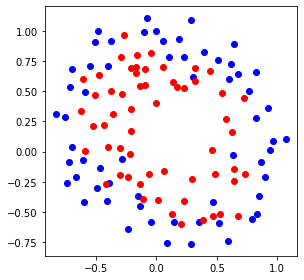

In [8]:
plt.figure()
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()